In [2]:
from google_play_scraper import app, reviews, Sort, reviews_all

import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
seed = 0
np.random.seed(seed)
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
import datetime as dt
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
from wordcloud import WordCloud
import nltk
import csv

nltk.download('punkt')
nltk.download('stopwords')

scrapreview = reviews_all(
    'com.byu.id',
    lang='id',
    country='id',
    sort=Sort.MOST_RELEVANT,
    count=1000
)

with open('review_byu.csv', mode='w', newline='', encoding='utf-8') as file:
    writer = csv.writer(file)
    writer.writerow(['Review'])
    for review in scrapreview:
        writer.writerow([review['content']])

[nltk_data] Downloading package punkt to /Users/fepriyadi/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/fepriyadi/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [17]:
app_reviews_df = pd.DataFrame(scrapreview)
app_reviews_df.shape
app_reviews_df.head()
app_reviews_df.to_csv('ulasan_aplikasi.csv', index=False)

app_reviews_df = pd.DataFrame(scrapreview)

jumlah_ulasan, jumlah_kolom = app_reviews_df.shape
app_reviews_df.head()

app_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117000 entries, 0 to 116999
Data columns (total 11 columns):
 #   Column                Non-Null Count   Dtype         
---  ------                --------------   -----         
 0   reviewId              117000 non-null  object        
 1   userName              117000 non-null  object        
 2   userImage             117000 non-null  object        
 3   content               117000 non-null  object        
 4   score                 117000 non-null  int64         
 5   thumbsUpCount         117000 non-null  int64         
 6   reviewCreatedVersion  95368 non-null   object        
 7   at                    117000 non-null  datetime64[ns]
 8   replyContent          109710 non-null  object        
 9   repliedAt             109710 non-null  datetime64[ns]
 10  appVersion            95368 non-null   object        
dtypes: datetime64[ns](2), int64(2), object(7)
memory usage: 9.8+ MB


In [18]:
cleand_df = app_reviews_df.dropna()

cleand_df.isna().sum()

reviewId                0
userName                0
userImage               0
content                 0
score                   0
thumbsUpCount           0
reviewCreatedVersion    0
at                      0
replyContent            0
repliedAt               0
appVersion              0
dtype: int64

In [19]:
cleand_df = cleand_df.drop_duplicates()

jumlah_ulasam_setelah_hapus_duplikat, jumlah_kolom_setelah_hapus_duplikat = cleand_df.shape


# Preprocessing Text

###  - Cleaning Text
### - Case folding
### - Tokenizing
### - Filtering
### - Stemming
### - toSentence(Menggabungkan)

In [20]:
import re
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory

def cleaningText(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) # menghapus mention
    text = re.sub(r'#[A-Za-z0-9]+', '', text) # menghapus hashtag
    text = re.sub(r'RT[\s]', '', text) # menghapus RT
    text = re.sub(r"http\S+", '', text) # menghapus link
    text = re.sub(r'[0-9]+', '', text) # menghapus angka
    text = re.sub(r'[^\w\s]', '', text) # menghapus karakter selain huruf dan angka

    text = text.replace('\n', '')
    text = text.translate(str.maketrans('', '', string.punctuation)) # menghapus semua tanda baca
    text = text.strip(' ') # menghapus karakter spasi dari dari kiri dan kanan teks

    return text

def casefoldingText(text):
    text = text.lower()
    return text

def tokenizingText(text):
    text = word_tokenize(text)
    return text

def filteringText(text):
    listStopwords = set(stopwords.words('indonesian'))
    listStopwords1 = set(stopwords.words('english'))
    listStopwords.update(listStopwords1)
    listStopwords.update(['iya','yaa','gak','nya','na','sih','ku',"di","ga","ya","gaa","loh","kah","woi","woii","woy"])

    filtered = []
    for txt in text:
        if txt not in listStopwords:
            filtered.append(txt)

    text = filtered
    return text

def stemmingText(text): # Mengurangi kata ke bentuk dasarnya yg menghilangkan imbuhan awalah dan akhiran atau ke akar kata
    factory = StemmerFactory()
    stemmer = factory.create_stemmer()

    words = text.split()

    # menerapkan stemming pada setiap kata dalam daftar
    stemmed_words = [stemmer.stem(word) for word in words]

    stemmed_text = ' '.join(stemmed_words)

    return stemmed_text

def toSentence(list_words):
    sentence = ' '.join(word for word in list_words)
    return sentence

slangwords = {"@": "di", "abis": "habis", "wtb": "beli", "masi": "masih", "wts": "jual", "wtt": "tukar", "bgt": "banget", "maks": "maksimal"}

def fix_slangwords(text):
    words = text.split()
    fixed_words = []

    for word in words:
        if word.lower() in slangwords:
            fixed_words.append(slangwords[word.lower()])
        else:
            fixed_words.append(word)

    fixed_text = ' '.join(fixed_words)
    return fixed_text


In [21]:
cleand_df['text_clean'] = cleand_df['content'].apply(cleaningText)

cleand_df['text_caseFoldingText'] = cleand_df['text_clean'].apply(casefoldingText)

cleand_df['text_slangwords'] = cleand_df['text_caseFoldingText'].apply(fix_slangwords)

cleand_df['text_tokenizingText'] = cleand_df['text_slangwords'].apply(tokenizingText)

cleand_df['text_stopword'] = cleand_df['text_tokenizingText'].apply(filteringText)

cleand_df['text_akhir'] = cleand_df['text_stopword'].apply(toSentence)

cleand_df

,reviewId,userName,userImage,content,score,thumbsUpCount,reviewCreatedVersion,at,replyContent,repliedAt,appVersion,text_clean,text_caseFoldingText,text_slangwords,text_tokenizingText,text_stopword,text_akhir
0,36014f67-2f37-4034-8cfc-a39f76f01ed5,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,sinyal bagus tapi buat buka apk nya lemot bang...,1,33,1.63.1,2025-10-15 16:06:42,Hallo Kak. Maaf banget udah bikin gak nyaman. ...,2025-10-15 16:08:06,1.63.1,sinyal bagus tapi buat buka apk nya lemot bang...,sinyal bagus tapi buat buka apk nya lemot bang...,sinyal bagus tapi buat buka apk nya lemot bang...,"[sinyal, bagus, tapi, buat, buka, apk, nya, le...","[sinyal, bagus, buka, apk, lemot, banget, nges...",sinyal bagus buka apk lemot banget ngestuk loa...
1,269f6fd9-615f-4ed6-9dd8-fd9411a82caf,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"untuk developer ,aplikasinya lemot dikit dikit...",1,21,1.63.0,2025-10-14 21:42:53,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2025-10-14 21:43:41,1.63.0,untuk developer aplikasinya lemot dikit dikit ...,untuk developer aplikasinya lemot dikit dikit ...,untuk developer aplikasinya lemot dikit dikit ...,"[untuk, developer, aplikasinya, lemot, dikit, ...","[developer, aplikasinya, lemot, dikit, dikit, ...",developer aplikasinya lemot dikit dikit login ...
2,ce1e598d-e54f-4a8d-9d1c-5fea795a39cc,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"udh hampir 1 tahun pake by u, aplikasi nya ber...",1,32,1.63.0,2025-10-12 20:18:16,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2025-10-12 20:19:00,1.63.0,udh hampir tahun pake by u aplikasi nya berat...,udh hampir tahun pake by u aplikasi nya berat...,udh hampir tahun pake by u aplikasi nya berat ...,"[udh, hampir, tahun, pake, by, u, aplikasi, ny...","[udh, pake, u, aplikasi, berat, banget, suka, ...",udh pake u aplikasi berat banget suka dibuka g...
3,695ba5b6-4df5-467d-80f5-afa1a7172c28,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"KECEWA, paket ""Yang Bikin Makin Aman Jaya"" tib...",1,42,1.63.0,2025-10-13 08:38:39,"Hai Kak, maaf ya udah bikin ga nyaman :( Terka...",2025-10-13 10:40:59,1.63.0,KECEWA paket Yang Bikin Makin Aman Jaya tiba t...,kecewa paket yang bikin makin aman jaya tiba t...,kecewa paket yang bikin makin aman jaya tiba t...,"[kecewa, paket, yang, bikin, makin, aman, jaya...","[kecewa, paket, bikin, aman, jaya, hilang, ter...",kecewa paket bikin aman jaya hilang tersedia b...
4,47343457-0877-41d5-97ba-39e07d4882e6,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kenapa sih tiap buka apk nya tiba² keluar send...,3,17,1.63.0,2025-10-11 21:00:00,"Hai Kak, maaf nih terkait kendala jaringan, bi...",2025-10-11 21:03:03,1.63.0,kenapa sih tiap buka apk nya tiba² keluar send...,kenapa sih tiap buka apk nya tiba² keluar send...,kenapa sih tiap buka apk nya tiba² keluar send...,"[kenapa, sih, tiap, buka, apk, nya, tiba², kel...","[buka, apk, tiba², beli, kuota, aja, lemot, ba...",buka apk tiba² beli kuota aja lemot bangettt n...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
116995,2fe7e5b1-d352-4931-a930-c4ba6ceae471,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,kurang memuaskannn,1,0,1.43.0,2023-08-28 18:11:28,"Hai Kak, maaf udah bikin ga nyaman ya :( Kalau...",2023-08-28 18:23:13,1.43.0,kurang memuaskannn,kurang memuaskannn,kurang memuaskannn,"[kurang, memuaskannn]",[memuaskannn],memuaskannn
116996,bcf672a1-c4b5-4861-941a-53739c68c56b,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,"udh baik, mantap",5,0,635,2021-02-14 15:10:45,Hai kak. Makasih buat feedbacknya. Nindy sama ...,2021-02-14 18:00:31,635,udh baik mantap,udh baik mantap,udh baik mantap,"[udh, baik, mantap]","[udh, mantap]",udh mantap
116997,cc4ddb53-9638-4b37-8367-dd25ef0c7d6c,Pengguna Google,https://play-lh.googleusercontent.com/EGemoI2N...,Min kok apk nya GK nisa di buka sih 😔,2,0,650,2022-05-15 13:42:48,"Hello, Kak Nuru

# Pelabelan

In [22]:
import csv
import requests
from io import StringIO

# membaca data kamus kata-kata positif dari github
lexicon_positive = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_positive.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

lexicon_negative = dict()

response = requests.get('https://raw.githubusercontent.com/angelmetanosaa/dataset/main/lexicon_negative.csv')

if response.status_code == 200:
    reader = csv.reader(StringIO(response.text), delimiter=',')

    for row in reader:
        lexicon_positive[row[0]] = int(row[1])
else:
    print("Failed to fetch positive lexicon data")

polarity
negative    66081
positive    23011
Name: count, dtype: int64


<function matplotlib.pyplot.show(close=None, block=None)>

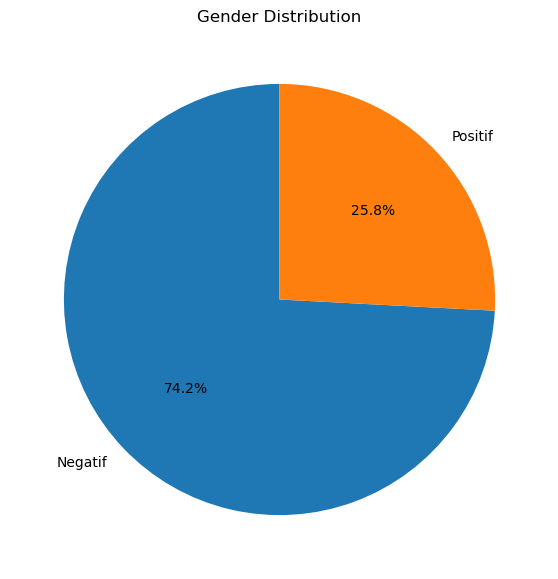

In [23]:
def sentiment_analysis_lexicon_indonesia(text):

    score = 0

    for word in text:
        if(word in lexicon_positive):
            score = score + lexicon_positive[word]

    for word in text:

        if(word in lexicon_negative):
            score = score + lexicon_negative[word]

    polarity = ''
    if (score >= 0):
        polarity = 'positive'
    elif(score < 0):
        polarity = 'negative'

    return score, polarity

results = cleand_df['text_stopword'].apply(sentiment_analysis_lexicon_indonesia)
results = list(zip(*results))
cleand_df['polarity_score'] = results[0]
cleand_df['polarity'] = results[1]

print(cleand_df['polarity'].value_counts())

plt.figure(figsize=(7, 7))
plt.pie(cleand_df['polarity'].value_counts(), labels=['Negatif', 'Positif'], autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution')
plt.show

# Data Splitting dan Ekstraksi Fitur dengan TF-IDF

In [24]:
from sklearn.feature_extraction.text import TfidfVectorizer

X = cleand_df['text_akhir']
y = cleand_df['polarity']

# Ekstraksi fitur dengan TF-IDF
tfidf = TfidfVectorizer(max_features=200, min_df=17, max_df=0.8)
X_tfidf = tfidf.fit_transform(X)

features_df = pd.DataFrame(X_tfidf.toarray(), columns=tfidf.get_feature_names_out())

features_df

,aja,aktif,aktivasi,aman,aneh,apk,aplikasi,aplikasinya,app,bagus,...,turun,udah,udh,ulang,unlimited,update,via,wifi,yg,youtube
0,0.121239,0.0,0.0,0.000000,0.0,0.160216,0.000000,0.00000,0.0,0.120569,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.130046,0.17839,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.374496,0.0,0.0,0.000000,0.0,0.000000,0.239285,0.00000,0.0,0.000000,...,0.0,0.131315,0.173728,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.000000,0.0,0.0,0.175387,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.279277,0.0,0.0,0.0,0.0,0.0
4,0.334300,0.0,0.0,0.000000,0.0,0.441774,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89087,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
89088,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.696491,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
89089,0.000000,0.0,0.0,0.000000,0.0,0.499144,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0
89090,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.000000,...,0.0,0.000000,0.000000,0.0,0.000000,0.0,0.0,0.0,0.0,0.0


# Naive Bayes

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

X_train, X_test, y_train, y_test = train_test_split(X_tfidf, y, test_size=0.2, random_state=42)

naive_bayes = BernoulliNB()

naive_bayes.fit(X_train.toarray(), y_train)

y_pred_train_nb = naive_bayes.predict(X_train.toarray())
y_pred_test_nb = naive_bayes.predict(X_test.toarray())

accuracy_train_nb = accuracy_score(y_pred_train_nb, y_train)
accuracy_test_nb = accuracy_score(y_pred_test_nb, y_test)

print('Naive Bayes - accuracy train: ', accuracy_train_nb)
print('Naive Bayes - accuracy test: ', accuracy_test_nb)

Naive Bayes - accuracy train:  0.8340886450689602
Naive Bayes - accuracy test:  0.8356248947752399


# Random Forest

In [26]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier()

random_forest.fit(X_train.toarray(), y_train)

y_pred_train_rf = random_forest.predict(X_train.toarray())
y_pred_test_rf = random_forest.predict(X_test.toarray())

accuracy_train_rf = accuracy_score(y_pred_train_rf, y_train)
accuracy_test_rf = accuracy_score(y_pred_test_rf, y_test)

print('Random Forest - accuracy train: ', accuracy_train_rf)
print('Random Forest - accuracy test: ', accuracy_test_rf)

Random Forest - accuracy train:  0.9622157058072481
Random Forest - accuracy test:  0.8705314551882821


# Logistic Regression

In [27]:
from sklearn.linear_model import LogisticRegression

logistic_regression = LogisticRegression()

logistic_regression.fit(X_train.toarray(), y_train)

y_pred_train_lr = logistic_regression.predict(X_train.toarray())
y_pred_test_lr = logistic_regression.predict(X_test.toarray())

accuracy_train_lr = accuracy_score(y_pred_train_lr, y_train)

accuracy_test_lr = accuracy_score(y_pred_test_lr, y_test)

print('Logistic Regression - accuracy train: ', accuracy_train_lr)
print('Logistic Regresssion - accuracy test: ', accuracy_test_lr)

Logistic Regression - accuracy train:  0.8869557897099883
Logistic Regresssion - accuracy test:  0.8848420225601885


# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier()

decision_tree.fit(X_train.toarray(), y_train)

y_pred_train_dt = decision_tree.predict(X_train.toarray())
y_pred_test_dt = decision_tree.predict(X_test.toarray())

accuracy_train_dt = accuracy_score(y_pred_train_dt, y_train)
accuracy_test_dt = accuracy_score(y_pred_test_dt, y_test)

print('Decision Tree - accuracy train: ', accuracy_train_dt)
print('Decision Tree - accuracy test: ', accuracy_test_dt)

Decision Tree - accuracy train:  0.9622437669243613
Decision Tree - accuracy test:  0.8378696896571076
